# 7 - Reporting
This notebook is used to plot a variety of results

## Setup

In [165]:
# Import libraries
import os
import datetime
from math import *

import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [166]:
# Set working directory
os.chdir(os.path.join('E:/',
                      'McKinley'))

# Directory to store downloaded Landsat 8 data
figure_dir = os.path.join('figures')

# Check if directory exists
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)
    
# Set Plotly Express template
pio.templates.default = "seaborn"

## Restore datasets

In [167]:
# Seeding unit NDVI metrics
%store -r su_ndvi_annual_change_df

# Seeding unit data
%store -r mckinley_seeding_subset

# Met data
%store -r met_data_mckinley_df_annual

## Create plots

### Plot 1 - Annual precipitation

In [173]:
fig = px.line(met_data_mckinley_df_annual, x='Year', y='pr',
              labels={
                  "Year": "Year",
                  "pr": "Precipitation (mm)"
              },
              title='Plot 1 - Annual precipitation for McKinley Mine')

# Credit
fig.add_annotation(text="Source: gridMET",
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.01, y=0.01)

fig.update_layout(showlegend=False)
fig.show()

### Plot 2 - Annual NDVI vs precipitation for the different seeding units

In [175]:
fig = px.scatter(su_ndvi_annual_change_df, x='precip', y='NDVI_delta',
                 labels={
                     "NDVI_delta": "Smoothed NDVI",
                     "precip": "Precipitation (mm)"
                 },
                 title='Plot 2 - Annual change in NDVI vs annual precipitation for the seeding units',
                 width=900, height=700,
                 hover_name="SuId", hover_data=["NDVI_delta"],
                 trendline="ols")

# Credit
fig.add_annotation(text="Source: Landsat 8 data from USGS, meteorological data from gridMET",
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.01, y=0.01)

fig.update_layout(showlegend=False)
fig.show()

### Plot 3 - Annual NDVI change vs year for the seeding units

In [93]:
fig = px.scatter(su_ndvi_annual_change_df, x='Year', y='NDVI_delta',
                 labels={
                     "NDVI_delta": "Smoothed NDVI",
                     "Year": "Year"
                 },
                 title='Plot 3 - Annual change in NDVI vs year for all seeding units',
                 width=900, height=700,
                 hover_name="SuId", hover_data=["NDVI_delta"],
                 trendline="ols")

# Credit
fig.add_annotation(text="Source: Landsat 8 data from USGS, meteorological data from gridMET",
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.01, y=0.01)

fig.update_layout(showlegend=False)
fig.show()

### Plot 4 - Annual NDVI change vs intervention year for the seeding units

In [94]:
fig = px.scatter(su_ndvi_annual_change_df, x='Intervention_Year', y='NDVI_delta',
                 labels={
                     "NDVI_delta": "Smoothed NDVI",
                     "Intervention_Year": "Intervention Year"
                 },
                 title='Plot 4 - Annual change in NDVI vs intervention year for seeding units',
                 width=900, height=700,
                 hover_name="SuId", hover_data=["NDVI_delta", "Year"])

# Credit
fig.add_annotation(text="Source: Landsat 8 data from USGS, meteorological data from gridMET",
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.01, y=0.01)

fig.update_layout(showlegend=False)
fig.show()

### Plot 5 - Mean annual NDVI vs intervention year for the seeding units

In [95]:
fig = px.scatter(su_ndvi_annual_change_df, x='Intervention_Year', y='NDVI_mean',
                 labels={
                     "NDVI_mean": "Smoothed NDVI",
                     "Intervention_Year": "Intervention Year"
                 },
                 title='Plot 5 - Mean annual NDVI vs intervention year for the seeding units',
                 width=900, height=700,
                 hover_name="SuId", hover_data=["NDVI_mean", "Year"])

# Credit
fig.add_annotation(text="Source: Landsat 8 data from USGS, meteorological data from gridMET",
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.01, y=0.01)

fig.update_layout(showlegend=False)
fig.show()

### Plot 6 - NDVI anomaly vs intervention year for the seeding units

In [164]:
fig = px.scatter(su_ndvi_annual_change_df, x='Intervention_Year', y='NDVI_anomaly',
                 labels={
                     "NDVI_anomaly": "Smoothed NDVI anomaly",
                     "Intervention_Year": "Intervention Year"
                 },
                 title='Plot 6 - NDVI anomaly vs intervention year for the seeding units',
                 width=900, height=700,
                 hover_name="SuId", 
                 hover_data=["NDVI_anomaly", "Year"],
                 color="Seed_Type")

fig.update_traces(marker={'size': 10})

for suid, data in su_ndvi_annual_change_df.sort_values('Intervention_Year', ascending=True).groupby('SuId'):

    fig.add_trace(
        go.Scatter(
            x=data['Intervention_Year'],
            y=data['NDVI_anomaly'],
            mode="lines",
            line=go.scatter.Line(color="gray", width= 1),
            showlegend=False)
    )

# Credit
fig.add_annotation(text="Source: Landsat 8 data from USGS",
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.01, y=0.01)

fig.update_layout(showlegend=True)
fig.show()

### Plot 7 - NDVI anomaly vs annual precipitation for the seeding units

In [130]:
fig = px.scatter(su_ndvi_annual_change_df, x='precip', y='NDVI_anomaly',
                 labels={
                     "NDVI_anomaly": "Smoothed NDVI anomaly",
                     "precip": "Precipitation (mm)"
                 },
                 title='Plot 7 - NDVI anomaly vs annual precipitation for the seeding units',
                 width=900, height=700,
                 hover_name="SuId", 
                 hover_data=["NDVI_anomaly", "Year"],
                 #size="precip",
                 color="Seed_Type")

# Credit
fig.add_annotation(text="Source: Landsat 8 data from USGS, meteorological data from gridMET",
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.01, y=0.01)

fig.update_layout(showlegend=True)
fig.show()

In [129]:
su_ndvi_annual_change_df[su_ndvi_annual_change_df['SuId'] == 172]

,SuId,Year,Intervention_Year,NDVI_delta,NDVI_mean,NDVI_anomaly,precip,eto,Seed_Type
0,172,2017,0,0.003429,0.102241,0.000000,246.700000,1507.600001,Seed
18,172,2018,1,0.014250,0.111236,0.042138,233.299999,1548.700000,Seed
43,172,2019,2,0.027377,0.126691,0.106803,283.499999,1417.999998,Seed
85,172,2020,3,0.027374,0.161916,0.225908,192.700000,1583.600001,Seed


In [10]:
# Plot of cumulative change in NDVI colored by seeding type

### Plot of annual NDVI change vs precipitation for all seeding units for a specific intervention year

In [85]:
# # Plot of annual change in NDVI vs precipitation for a specific intervention year
year = 0
title = "Plot of change in NDVI vs annual precipitation for year " + \
    str(year) + " after intervention"

fig = px.scatter(su_ndvi_annual_change_df[su_ndvi_annual_change_df['Intervention_Year'] == year],
                 x='precip', y='NDVI_delta',
                 labels={
                     "NDVI_delta": "Smoothed NDVI",
                     "precip": "Precipitation (mm)"
},
    title=title,
    width=900, height=700,
    hover_name="SuId", hover_data=["NDVI_delta", "Year"],
    trendline="ols")

# Credit
fig.add_annotation(text="Source: Landsat 8 data from USGS, meteorological data from gridMET",
                   showarrow=False,
                   xref="paper", yref="paper",
                   x=0.01, y=0.01)

fig.update_layout(showlegend=False)
fig.show()

## Additional plots/work

- Plot of annual max NDVI vs precipitation for all years; what is the impact of rainfall on annual greenup? Label by seeding type? Are there different trends for different intervention measures?
- Plot of cumulative NDVI and precipitation for seeding unit years; how do the different histories of precipitation affect the NDVI trend
- Calculate correlation between precipitation and NDVI time series; shift in time to establish time to response from preciptation events to NDVI response?

# Backup code to delete

### Plots of seeding unit data

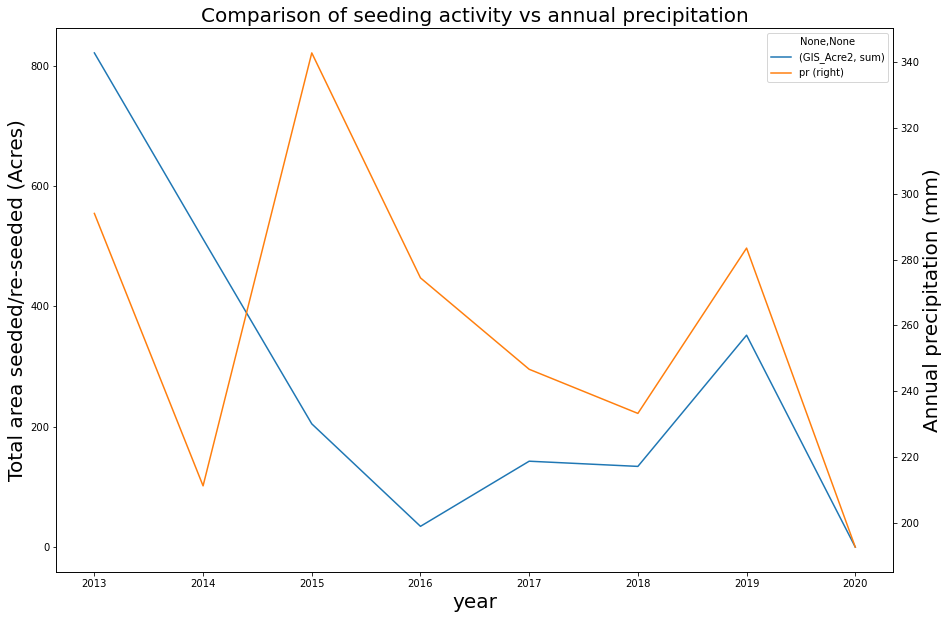

In [6]:
# Setup plots
fig, ax = plt.subplots(figsize=(15, 10))

#legend_items = ['Filtered seeding units', 'Annual precipitation']

# Plot acreage seeded/re-seeded per year
mckinley_seeding_subset.groupby('Start_Year').agg({'GIS_Acre2': ['sum']}).plot(ax=ax)


plt.xlabel("Year", fontsize=20)
plt.ylabel("Total area seeded/re-seeded (Acres)", fontsize=20)

# Plot annual precipitation
met_data_mckinley_df_annual.plot(x='year', y='pr', ax=ax, secondary_y=True)

ax.set_title(
    "Comparison of seeding activity vs annual precipitation", fontsize=20)

plt.ylabel("Annual precipitation (mm)", fontsize=20)


plt.show()